# Pandas Basics Part 3 — Workbook

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [3]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [4]:
pd.options.display.max_rows = 200

## Get Data

In [5]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [ ]:
film_df.sample(10)

Generate information about all the columns in the data 

In [ ]:
film_df.info()

Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

In [ ]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [ ]:
film_df.describe(include='all')

### ❓ What patterns or outliers do you notice?

## Drop Rows

In [ ]:
film_df[film_df['age'] > 100]

If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [602]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [ ]:
film_df

In [605]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [67]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [ ]:
film_df.head()

## Filter

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [179]:
film_filter = ...

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [ ]:
film_df[film_filter]

Now pick a character from this film (or another character) and filter the DataFrame by character.

In [179]:
character_filter = ...

In [ ]:
film_df[character_filter]

### ❓ How does this data align with your experience/knowledge of the film?
### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

## Sort Values

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
film_df...

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Groupby

Group by film and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [ ]:
film_df.groupby...

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [ ]:
film_df.groupby...

## Filter, Then Groupby

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Filter the DataFrame for only characters labeled as `woman`

In [6]:
women_filter = film_df['gender'] == 'woman'

In [7]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [8]:
men_filter = film_df['gender'] == 'man'

In [9]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [10]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [11]:
women_by_film = women_film_df.groupby('title')['words'].sum()

Using the same construction, make a new another new variable `men_by_film`

In [12]:
men_by_film = men_film_df.groupby('title')['words'].sum()

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [ ]:
women_by_film.sort_values(ascending=False)[:20]

Assign this sorted list of movies to the variable `top20_women`

In [435]:
top20_women = women_by_film.sort_values(ascending=False)[:20]

Using the same construction, make a new variable `top20_men`

In [436]:
top20_men = men_by_film.sort_values(ascending=False)[:20]

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Saving Plots

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

In [ ]:
top20_women.plot(kind='bar')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

In [ ]:
ax = top20_women.plot(kind='bar')
ax.figure.savefig('top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [ ]:
women_film_df.groupby('age')['words'].sum().reset_index()

In [14]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [15]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

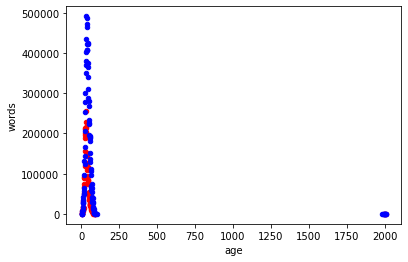

In [16]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
Group work!
</div>

In [645]:
# Your code here
# Your code here